In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
import datetime
import numpy as np
from matplotlib import font_manager, rc


fe = font_manager.FontEntry(
    fname=r'D:\my_jupyter\EXAM_VISUALIZATION\mini_project\KBO Dia Gothic_TTF\KBO Dia Gothic_bold.ttf', # ttf 파일이 저장되어 있는 경로
    name='KBO Dia Gothic_bold')                        # 이 폰트의 원하는 이름 설정
font_manager.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 12, 'font.family': 'KBO Dia Gothic_bold'}) # 폰트 설정


In [285]:
df_child_2017_2019 = pd.read_excel("2017-2019대구어린이보호구역_교통사고.xlsx")

In [286]:
df_child_2020_2022 = pd.read_excel("2020-2022대구어린이보호구역_교통사고.xlsx")

In [287]:
# concat으로 연결후, index 초기화
df_child_2017_2022 = pd.concat([df_child_2017_2019,df_child_2020_2022],ignore_index=True)

In [288]:
# 기본정보 확인, (가해,피해)연령이 object 확인
print(df_child_2017_2022.shape)
print(df_child_2017_2022.columns)
print(df_child_2017_2022.info())

(343, 22)
Index(['사고번호', '사고일시', '요일', '시군구', '사고내용', '사망자수', '중상자수', '경상자수', '부상신고자수',
       '사고유형', '법규위반', '노면상태', '기상상태', '도로형태', '가해운전자 차종', '가해운전자 성별',
       '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별', '피해운전자 연령',
       '피해운전자 상해정도'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   사고번호        343 non-null    int64 
 1   사고일시        343 non-null    object
 2   요일          343 non-null    object
 3   시군구         343 non-null    object
 4   사고내용        343 non-null    object
 5   사망자수        343 non-null    int64 
 6   중상자수        343 non-null    int64 
 7   경상자수        343 non-null    int64 
 8   부상신고자수      343 non-null    int64 
 9   사고유형        343 non-null    object
 10  법규위반        343 non-null    object
 11  노면상태        343 non-null    object
 12  기상상태        343 non-null    object
 13  도로형태        343 no

In [289]:
# 피해 사례의 경우는 결측치를 평균, 최빈값, 중간값으로 채우기가 어렵기 때문에 drop하기
df_child_2017_2022.dropna(inplace=True)

In [290]:
# 연령의 경우 "~~세"이기 때문에 object이고, 중간에 "미분류" 데이터가 있어 drop 필요
# boolean 인덱스로 "미분류" 제거

mask = (df_child_2017_2022['가해운전자 연령'] !="미분류") &(df_child_2017_2022['피해운전자 연령'] !="미분류") 

In [291]:
# 미분류 데이터 제거된 DF 만듦
df_child_2017_2022=df_child_2017_2022[mask]

In [292]:
#~~세에서 "세" 제거
#연령 데이터를 Object에서 int로 바꾸기
df_child_2017_2022["가해운전자 연령"]=df_child_2017_2022["가해운전자 연령"].str.replace("세","").astype(int)
df_child_2017_2022["피해운전자 연령"]=df_child_2017_2022["피해운전자 연령"].str.replace("세","").astype(int)

In [293]:
# 연령변경 확인
print(df_child_2017_2022["가해운전자 연령"].dtype)
print(df_child_2017_2022["피해운전자 연령"].dtype)

int32
int32


In [294]:
# 가해자 연령범주화
# 10대 이하, 10대, 20대, 30대, 40대, 50대, 60대 이상 -> 7개 범주
bin_name_ = ['10대 미만', '10대', '20대', '30대', '40대', '50대', '60대 이상']
bin_dividers_=[0,10,20,30,40,50,60,100]
df_child_2017_2022["가해운전자 연령 범주"] = pd.cut(x=df_child_2017_2022["가해운전자 연령"],bins=bin_dividers_,labels=bin_name_)


In [295]:
# 피해자 연령범주화
# 10대 이하, 10대, 20대, 30대, 40대, 50대, 60대 이상 -> 7개 범주
bin_name_ = ['10대 미만', '10대', '20대', '30대', '40대', '50대', '60대 이상']
bin_dividers_=[0,10,20,30,40,50,60,100]
df_child_2017_2022["피해운전자 연령 범주"] = pd.cut(x=df_child_2017_2022["피해운전자 연령"],bins=bin_dividers_,labels=bin_name_)


In [296]:
# 년월일 datetime 만들어서 새로운 컬럼 추가
# 사고번호 슬라이싱 위해 str 접근자 사용
df_child_2017_2022["사고년월일"]=df_child_2017_2022["사고번호"].astype(str).str[:8].apply(lambda x: pd.to_datetime(x))

In [297]:
# datetime 변경 확인
df_child_2017_2022["사고년월일"].dtype

dtype('<M8[ns]')

In [298]:
#사고일시 데이터에서 시간만 추출해서 할당
df_child_2017_2022["사고일시"]=df_child_2017_2022["사고일시"].str[-4:-1:].astype(int)

In [299]:
#사고년월일 컬럼에서 사고년도만 추출해서 컬럼 생성
df_child_2017_2022["사고년도"]=df_child_2017_2022["사고년월일"].dt.year

In [300]:
# 데이터타입 확인
df_child_2017_2022["사고년도"].dtype

dtype('int64')

In [301]:
#사고년월일 컬럼에서 사고월만 추출해서 컬럼 생성
df_child_2017_2022["사고월"] = df_child_2017_2022["사고년월일"].dt.month

In [302]:
# 데이터타입 확인
df_child_2017_2022["사고월"].dtype

dtype('int64')

In [303]:
#사고년월일 컬럼에서 사고년월 추출해서 컬럼 생성
df_child_2017_2022["사고년월"] = df_child_2017_2022["사고년월일"].dt.to_period(freq="M")

In [304]:
# 데이터타입 확인
df_child_2017_2022["사고년월"].dtype

period[M]

In [305]:
# 운전자 상해정도 확인했는데, 기타불명 발견
# 부상 정도를 수치로 바꾸려고 했는데, 기타불명은 0으로 취급해야 할듯
print(df_child_2017_2022["가해운전자 상해정도"].unique())
print(df_child_2017_2022["피해운전자 상해정도"].unique())

['상해없음' '경상' '중상' '부상신고' '기타불명' '사망']
['경상' '중상' '상해없음' '부상신고' '사망' '기타불명']


In [306]:
# 가해운전자 상해정도를 수치화해서 가해운전자 상해 위험도로 컬럼을 만듦.
df_child_2017_2022["가해운전자 상해 위험도"]=df_child_2017_2022["가해운전자 상해정도"].replace({"경상":1,"중상":2,"상해없음":1,"사망":3,"부상신고":1,"기타불명":0})

In [307]:
# 피해운전자 상해정도를 수치화해서 피해운전자 상해 위험도로 컬럼을 만듦.
df_child_2017_2022["피해운전자 상해 위험도"]=df_child_2017_2022["피해운전자 상해정도"].replace({"경상":1,"중상":2,"상해없음":1,"사망":3,"부상신고":1,"기타불명":0})

In [308]:
#민식이법 시행일인 2020년 3월 25일 전 사고 건수 
before_law_count=(df_child_2017_2022["사고년월일"]<="2020-03-25").sum()
print(before_law_count)

138


In [309]:
#민식이법 시행일인 2020년 3월 25일 후 사고 건수 
after_law_count=(df_child_2017_2022["사고년월일"]>="2020-03-25").sum()
print(after_law_count)

199


In [310]:
# 민식이법 법률이 시행된 날짜 수 확인. days로 int로 형변환
law_day = pd.to_datetime("2020-03-25")
df_child_2017_2022["법률 시행된 일수"]= (df_child_2017_2022["사고년월일"]-law_day).dt.days

In [311]:
# 타입 확인
df_child_2017_2022["법률 시행된 일수"].dtype

dtype('int64')

In [312]:
# 민식이법 법률 시행 전/후 여부 확인 디바이더 생성
bin_name = ["법률 시행 전","법률 시행 후"]
bin_dividers=[df_child_2017_2022.loc[0,"사고년월일"],law_day,df_child_2017_2022.loc[342,"사고년월일"]]
print(bin_dividers)

[Timestamp('2017-01-10 00:00:00'), Timestamp('2020-03-25 00:00:00'), Timestamp('2022-12-23 00:00:00')]


In [313]:
# 민식이법 법률 시행 전/후 여부 확인 컬럼 생성
df_child_2017_2022["법률 시행 전/후"]=pd.cut(x=df_child_2017_2022["사고년월일"],bins=bin_dividers,labels=bin_name,include_lowest=True)

In [314]:
# 범주형으로 잘 바뀌었는지 확인
print(df_child_2017_2022["법률 시행 전/후"].head())
print(df_child_2017_2022["법률 시행 전/후"].tail())

0    법률 시행 전
1    법률 시행 전
2    법률 시행 전
3    법률 시행 전
4    법률 시행 전
Name: 법률 시행 전/후, dtype: category
Categories (2, object): ['법률 시행 전' < '법률 시행 후']
338    법률 시행 후
339    법률 시행 후
340    법률 시행 후
341    법률 시행 후
342    법률 시행 후
Name: 법률 시행 전/후, dtype: category
Categories (2, object): ['법률 시행 전' < '법률 시행 후']


In [315]:
# 법률 시행 전/후 교통사고 건수 확인
# SR에 담음
accident_count=df_child_2017_2022["법률 시행 전/후"].value_counts()

In [316]:
#데이터 확인
accident_count

법률 시행 후    199
법률 시행 전    138
Name: 법률 시행 전/후, dtype: int64

In [317]:
# 사고건수는 자체는 날짜 개념을 담지 못해서, 
#시행 전/후 며칠이나 되었는지 반영하기 위해 시행 전/후 날짜 수를 나눈다.
# 시행전은 음수이니 abs() 양수로 바꿈
accident_count[1]= accident_count[1]/abs(df_child_2017_2022.loc[0,"법률 시행된 일수"])
accident_count[0]= accident_count[0]/(df_child_2017_2022.loc[342,"법률 시행된 일수"])


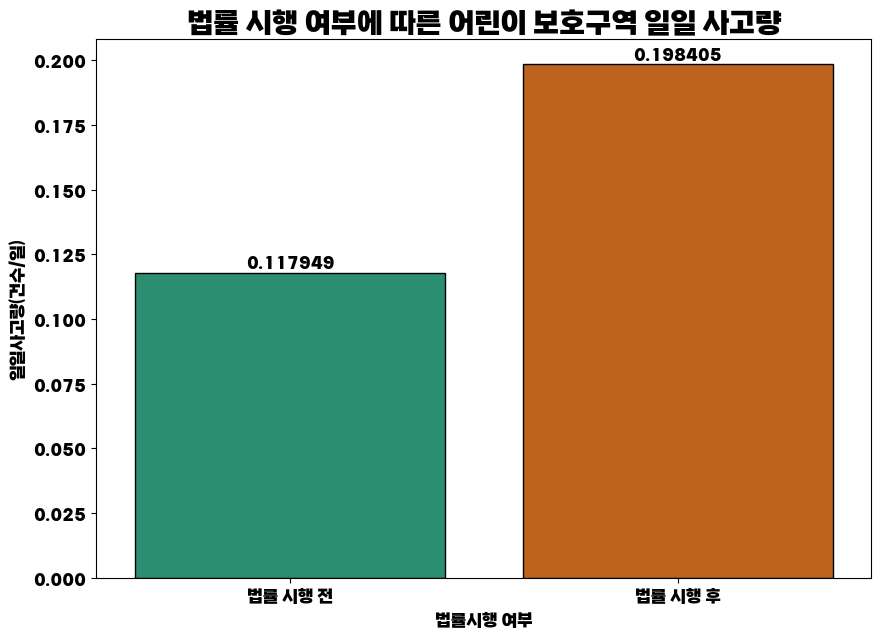

In [356]:
# 법률 시행 여부에 따른 일일 사고량 시각화 -> 소숫점 해결해야 함!
fig= plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(1,1,1)
contrast_colors = sns.color_palette("Dark2")
sns.barplot(x=accident_count.index, y= accident_count,palette=contrast_colors,ax=ax1,edgecolor="black")
ax1.set_title("법률 시행 여부에 따른 어린이 보호구역 일일 사고량",size=20)
ax1.set_xlabel("법률시행 여부",size=12)
ax1.set_ylabel("일일사고량(건수/일)",size=12)
for i in ax1.containers:
    ax1.bar_label(i,size=12)
ax1.bar_label
plt.show()

In [319]:
# 요일별 사고현황을 보기 위해 새로운 SR 생성
# 다만 요일 자체는 인덱스 정렬한다고 하더라도, 월~일 순서가 되지 않아 인덱스 정렬을 하지 않음.
yoil_sr=df_child_2017_2022["요일"].value_counts()

In [320]:
# 요일별 사고현황을 보기 위해 새로운 SR 생성
hour_sr=df_child_2017_2022["사고일시"].value_counts().sort_index()

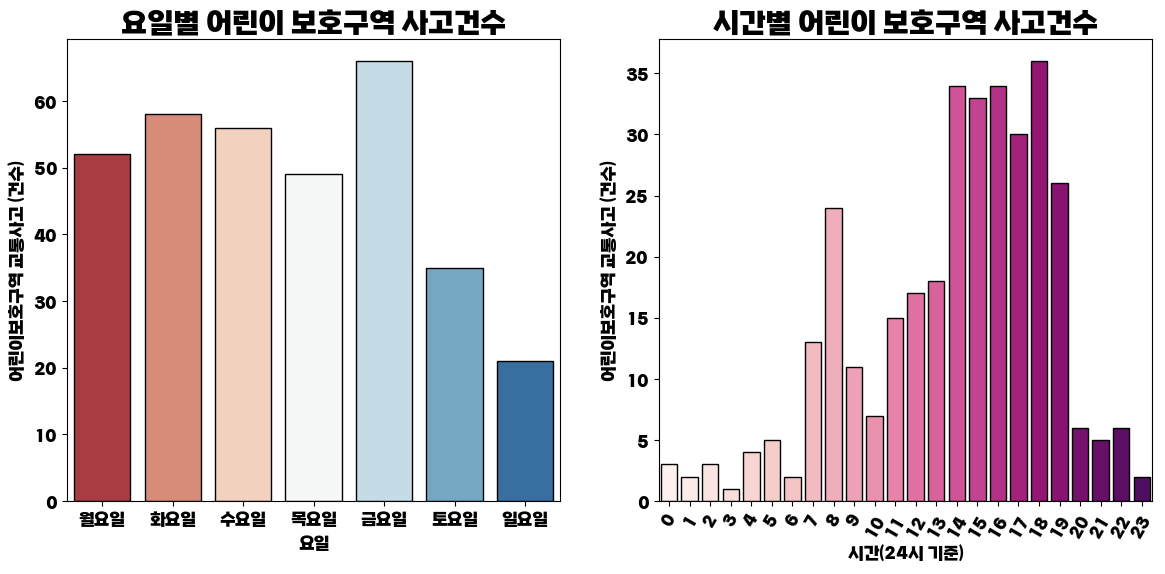

In [355]:
# 월~일 순서로 정렬하기 위해서 인덱스 리스트를 따로 만들고, yoil_Sr을 이용해 값을 얻음.
yoil_index_list=["월요일","화요일","수요일","목요일","금요일","토요일","일요일"]
yoil_value_list=[]
for i in yoil_index_list:
    yoil_value_list.append(yoil_sr[i])

# 추후에 쓸지모르니 시리즈로 만들어 놓음
sorted_yoil_sr= pd.Series(yoil_value_list,index=yoil_index_list)

# 요일별 시각화
fig= plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# 팔레트 설정
yoil_colors = sns.color_palette("RdBu", 7)


# 요일별에 따르면 학교에 등교하는 월~금 사고 건수가 많은 반면, 등교하지 않는 토,일은 건수가 적음.
# 주목할 점은 금요일에 많은 편

sns.barplot(x=["월요일","화요일","수요일","목요일","금요일","토요일","일요일"],y=yoil_value_list,ax=ax1,palette=yoil_colors,edgecolor="black")
ax1.set_title("요일별 어린이 보호구역 사고건수",size=20)
ax1.set_xlabel("요일",size=12)
ax1.set_ylabel("어린이보호구역 교통사고 (건수)",size=12)

# 팔레트 설정
hour_colors = sns.color_palette("RdPu", 24)

#  시간별에 따르면 출근 및 등교시간 때인 ,7,8시에 사고건수가 높은편
#  하교 및 퇴근시간인 14시부터 19시 정도까지는 사건건수가 높은편
sns.barplot(x=hour_sr.index,y=hour_sr,ax=ax2,palette=hour_colors,edgecolor="black")
ax2.set_xticklabels(hour_sr.index,rotation = 60)
ax2.set_title("시간별 어린이 보호구역 사고건수",size=20)
ax2.set_xlabel("시간(24시 기준)",size=12)
ax2.set_ylabel("어린이보호구역 교통사고 (건수)",size=12)
plt.show()

In [322]:
# 월~일 인덱스 정렬을 위해 요일을 숫자로 바꾸는 함수 만듦.
def yoil_check(str1):
    if str1== "월요일":
        return 0
    elif str1== "화요일":
        return 1
    elif str1== "수요일":
        return 2
    elif str1== "목요일":
        return 3
    elif str1== "금요일":
        return 4
    elif str1== "토요일":
        return 5
    else:
        return 6    

In [323]:
# 요일을 숫자로 바꾼 새로운 컬럼 생성
df_child_2017_2022["요일 숫자"]=df_child_2017_2022["요일"].apply(yoil_check)

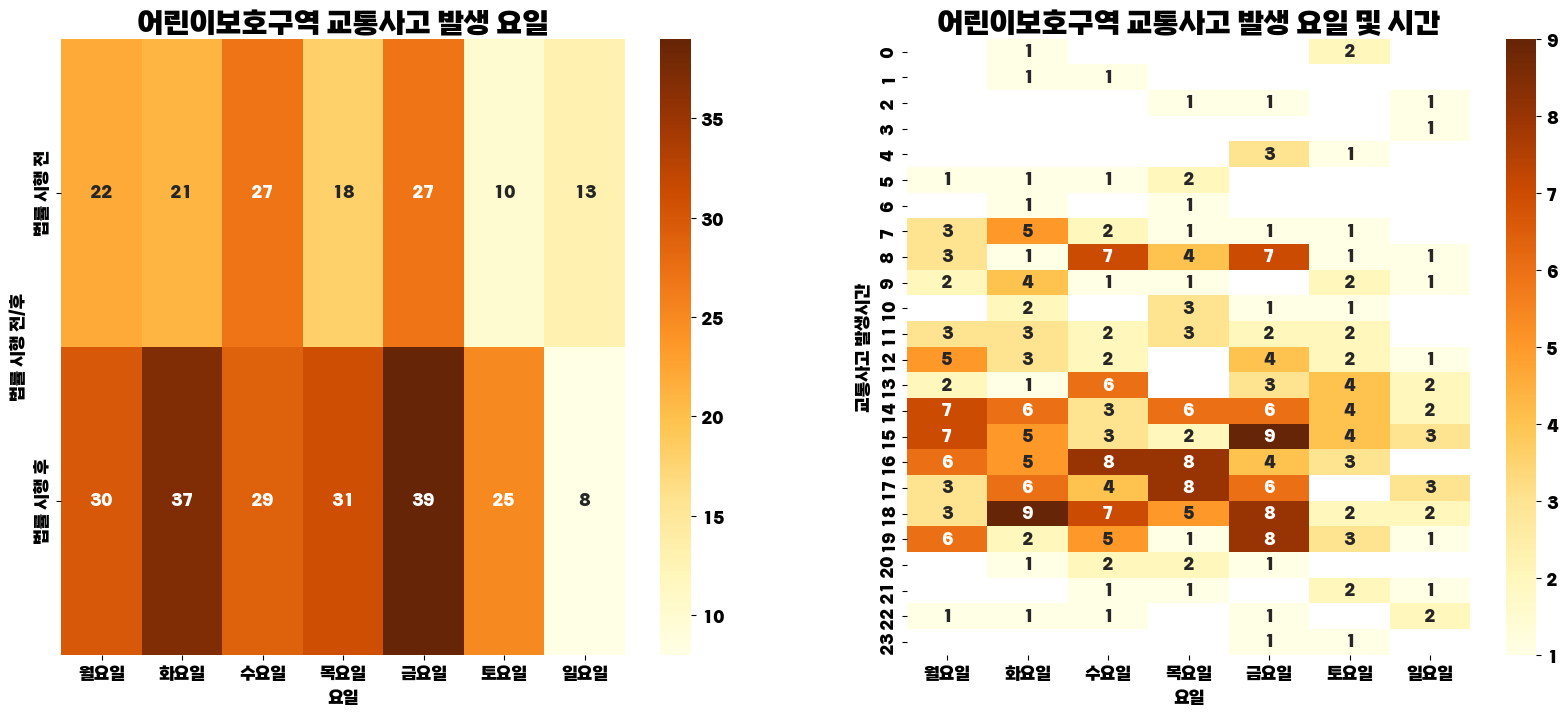

In [357]:
# 어린리보호구역 교통사고 발생 요일 및 시간 그래프 만들기

fig= plt.figure(figsize=(20,8))
ax1= fig.add_subplot(1,2,2)
ax2= fig.add_subplot(1,2,1)


# 시간대는 등교,출근 시간인 7-8시와 하교 시간인 3-4시와 퇴근시간인 6-7시에 교통사고량이 많았음.

table2= df_child_2017_2022.pivot_table(index=["사고일시"],columns=["요일 숫자"],aggfunc="size")
sns.heatmap(table2,annot=True,cmap="YlOrBr",ax=ax1)
ax1.set_xticklabels(["월요일","화요일","수요일","목요일","금요일","토요일","일요일"])
ax1.set_xlabel(xlabel="요일",size=12)
ax1.set_ylabel(ylabel="교통사고 발생시간",size=12)
ax1.set_title("어린이보호구역 교통사고 발생 요일 및 시간",size=20)


# 어린이 보호구역이다 보니까 아무래도 주말보다는 평일날 많이 발생, 특히 금요일이 많았음.

table3= df_child_2017_2022.pivot_table(index=["법률 시행 전/후"],columns=["요일 숫자"],aggfunc="size")
sns.heatmap(table3,annot=True,cmap="YlOrBr",ax=ax2)
ax2.set_xticklabels(["월요일","화요일","수요일","목요일","금요일","토요일","일요일"])
ax2.set_xlabel(xlabel="요일",size=12)
ax2.set_title("어린이보호구역 교통사고 발생 요일",size=20)                                                                                                                                             
plt.show()


In [325]:
#사고년월을 갯수을 세부적으로 보기 위해 boolean 인덱스 설정
month_mask=(df_child_2017_2022["사고년월"] >= "201908") & (df_child_2017_2022["사고년월"] <= "202010")

In [326]:
#세부 사고년월을 보기위한 SR 추출
month_sr=df_child_2017_2022.loc[month_mask,"사고년월"].value_counts().sort_index()

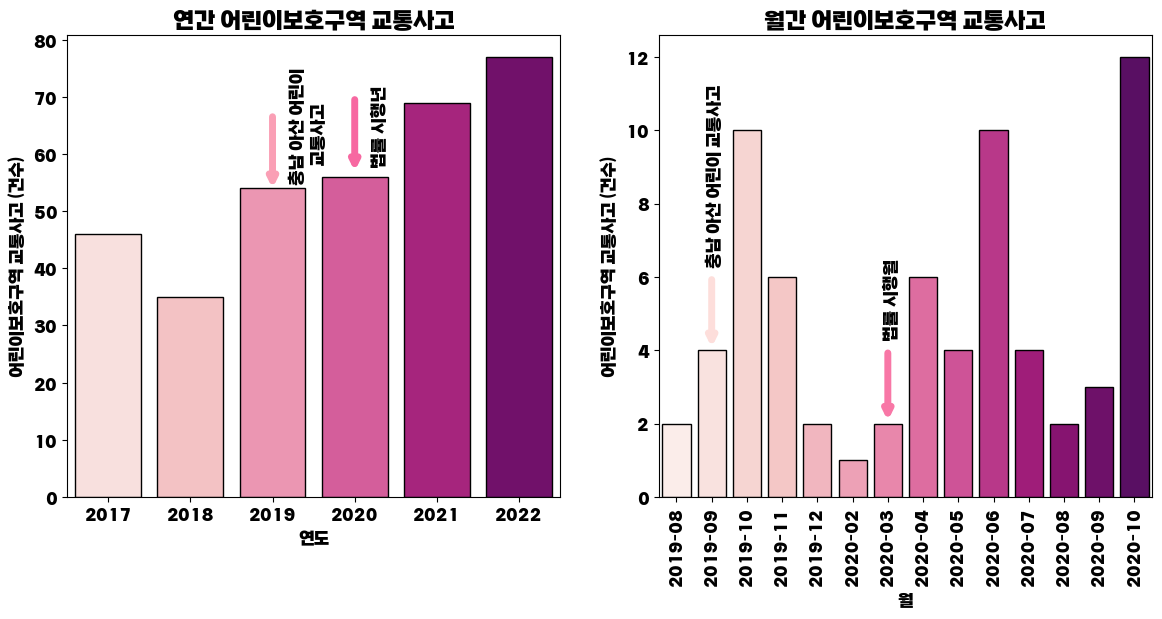

In [327]:
#기본적인 사고현황1(년/월 사고분포)
fig= plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
diverging_colors = sns.color_palette("RdPu", 6)
sequential_colors = sns.color_palette("RdPu", 14)

sns.countplot(x="사고년도", data=df_child_2017_2022,ax=ax1,palette=diverging_colors,edgecolor="black")
ax1.set_title("연간 어린이보호구역 교통사고",size=16)
ax1.set_xlabel("연도",size=12)
ax1.set_ylabel("어린이보호구역 교통사고 (건수)",size=12)

ax1.annotate("충남 아산 어린이 \n     교통사고",xy=(2.2,55.5),rotation =90)
ax1.annotate("",xy=(2,53.5),xytext=(2,67),xycoords="data",arrowprops=dict(arrowstyle="->",color="#fa9fb5",lw=5))
ax1.annotate("법률 시행년",xy=(3.2,58.5),rotation =90)
ax1.annotate("",xy=(3,56.5),xytext=(3,70),xycoords="data",arrowprops=dict(arrowstyle="->",color="#f768a1",lw=5))

sns.barplot(x=month_sr.index,y=month_sr,palette=sequential_colors,ax=ax2,edgecolor="black")

ax2.set_title("월간 어린이보호구역 교통사고",size=16)
ax2.set_xlabel("월",size=12)
ax2.set_ylabel("어린이보호구역 교통사고 (건수)",size=12)

ax2.set_xticklabels(month_sr.index,rotation = 90)
ax2.annotate("충남 아산 어린이 교통사고",xy=(0.85,6.4),rotation =90)
ax2.annotate("",xy=(1,4),xytext=(1,6),xycoords="data",arrowprops=dict(arrowstyle="->",color=(0.9918954248366013, 0.8713725490196078, 0.8590849673202615),lw=5))
ax2.annotate("법률 시행월",xy=(5.85,4.4),rotation =90)
ax2.annotate("",xy=(6,2),xytext=(6,4),xycoords="data",arrowprops=dict(arrowstyle="->",color=(0.971764705882353, 0.465359477124183, 0.6522875816993464),lw=5))

plt.show()

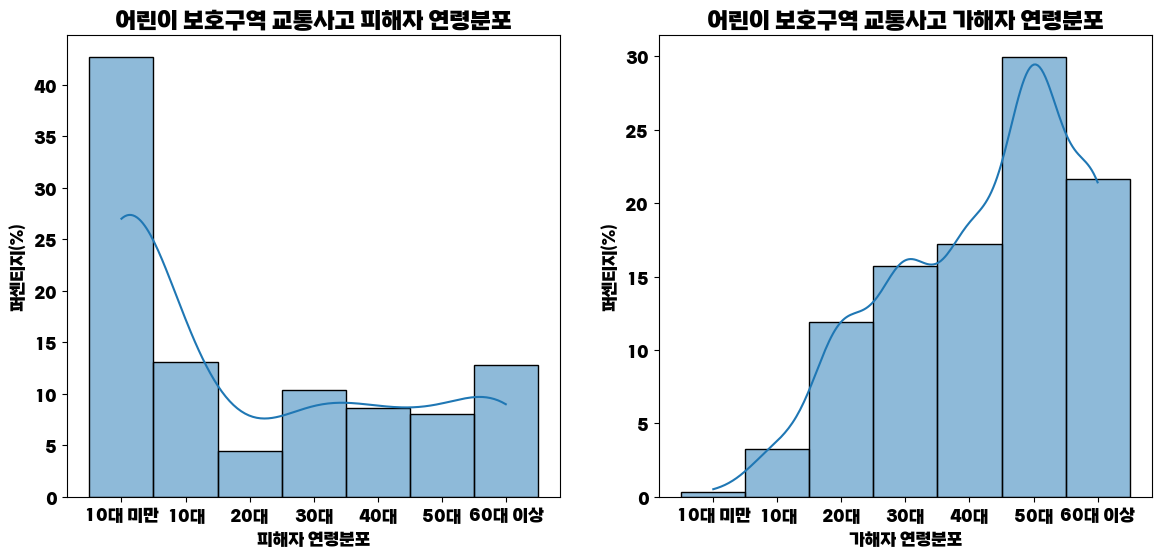

In [328]:
# 기본적인 사고현황2(가해자/피해자 연령분포)
# 어린이보호구역이니 아무래도 피해자 중 10대 미만과 10대 비중이 높게 나타남.
# 가해자의 경우 50대, 60대 이상의 비중이 높게 나타남.
fig= plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.histplot(x="피해운전자 연령 범주",stat="percent",multiple="stack",data=df_child_2017_2022,kde=True,ax=ax1)
sns.histplot(x="가해운전자 연령 범주",stat="percent",multiple="stack",data=df_child_2017_2022,kde=True,ax=ax2)
ax1.set_title("어린이 보호구역 교통사고 피해자 연령분포",size=16)
ax1.set_xlabel("피해자 연령분포",size=12)
ax1.set_ylabel("퍼센티지(%)",size=12)
ax2.set_title("어린이 보호구역 교통사고 가해자 연령분포",size=16)
ax2.set_xlabel("가해자 연령분포",size=12)
ax2.set_ylabel("퍼센티지(%)",size=12)
plt.show()

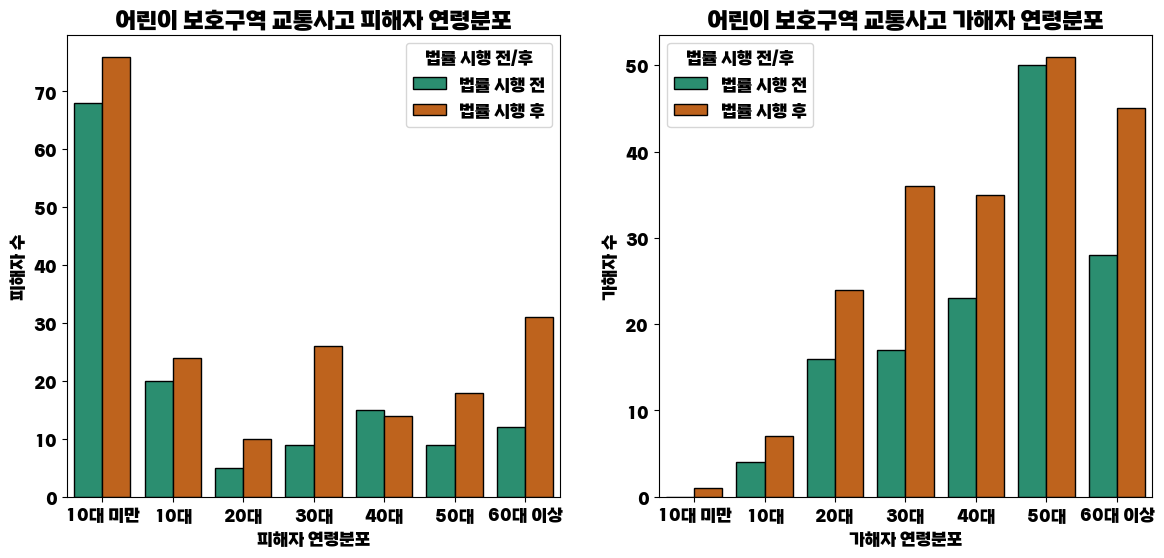

In [329]:
# 법률 시행 전/후의 (가해자/피해자 연령분포)
# 어린이 보호구역 내 사고를 줄이자는 의의와는 다르게 40대를 제외한 모든 연령층에서 피해자 수 증가
# 가해자의 경우 30대와 60대의 가해자 수가 크게 증가

fig= plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.countplot(x="피해운전자 연령 범주",palette=contrast_colors,hue="법률 시행 전/후",edgecolor="black",data=df_child_2017_2022,ax=ax1)
sns.countplot(x="가해운전자 연령 범주",palette=contrast_colors,hue="법률 시행 전/후",edgecolor="black",data=df_child_2017_2022,ax=ax2)
ax1.set_title("어린이 보호구역 교통사고 피해자 연령분포",size=16)
ax1.set_xlabel("피해자 연령분포",size=12)
ax1.set_ylabel("피해자 수",size=12)
ax2.set_title("어린이 보호구역 교통사고 가해자 연령분포",size=16)
ax2.set_xlabel("가해자 연령분포",size=12)
ax2.set_ylabel("가해자 수",size=12)

plt.show()

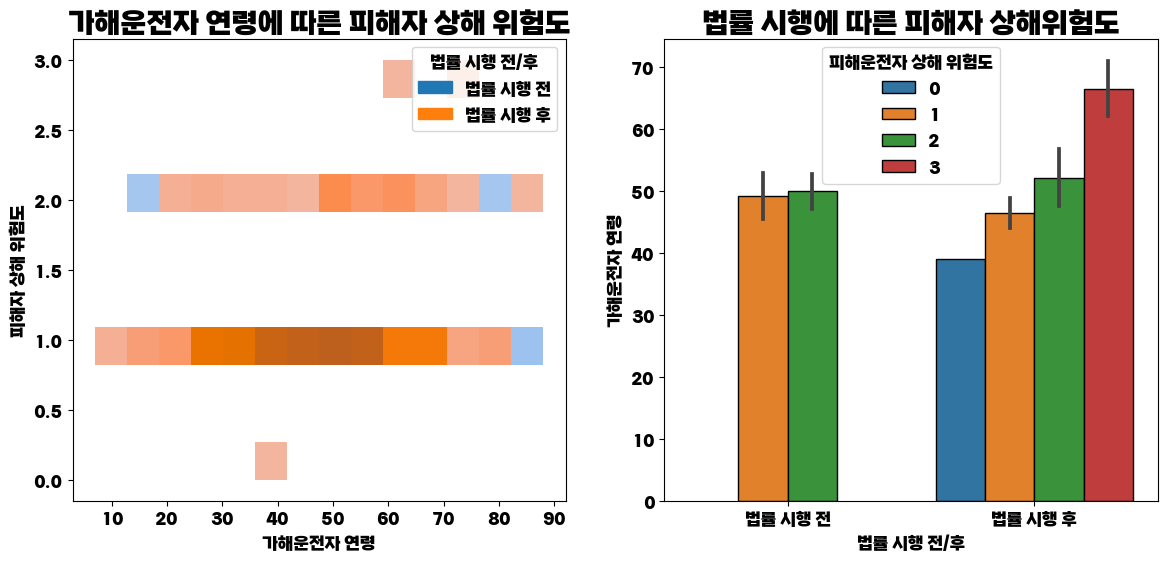

In [364]:
# 법률 시행 이후에 사망에 해당되는 3수준의 상해위험도가 발생했으며, 60대 이상에서 발생 
fig= plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.histplot(x="가해운전자 연령",y="피해운전자 상해 위험도",hue="법률 시행 전/후",data=df_child_2017_2022,ax=ax1)
sns.barplot(x="법률 시행 전/후",y="가해운전자 연령",edgecolor="black",hue="피해운전자 상해 위험도",data=df_child_2017_2022,ax=ax2)
ax1.set_title("가해운전자 연령에 따른 피해자 상해 위험도",size=20)
ax1.set_ylabel("피해자 상해 위험도",size=12)
ax2.set_title("법률 시행에 따른 피해자 상해위험도",size=20)

plt.show()

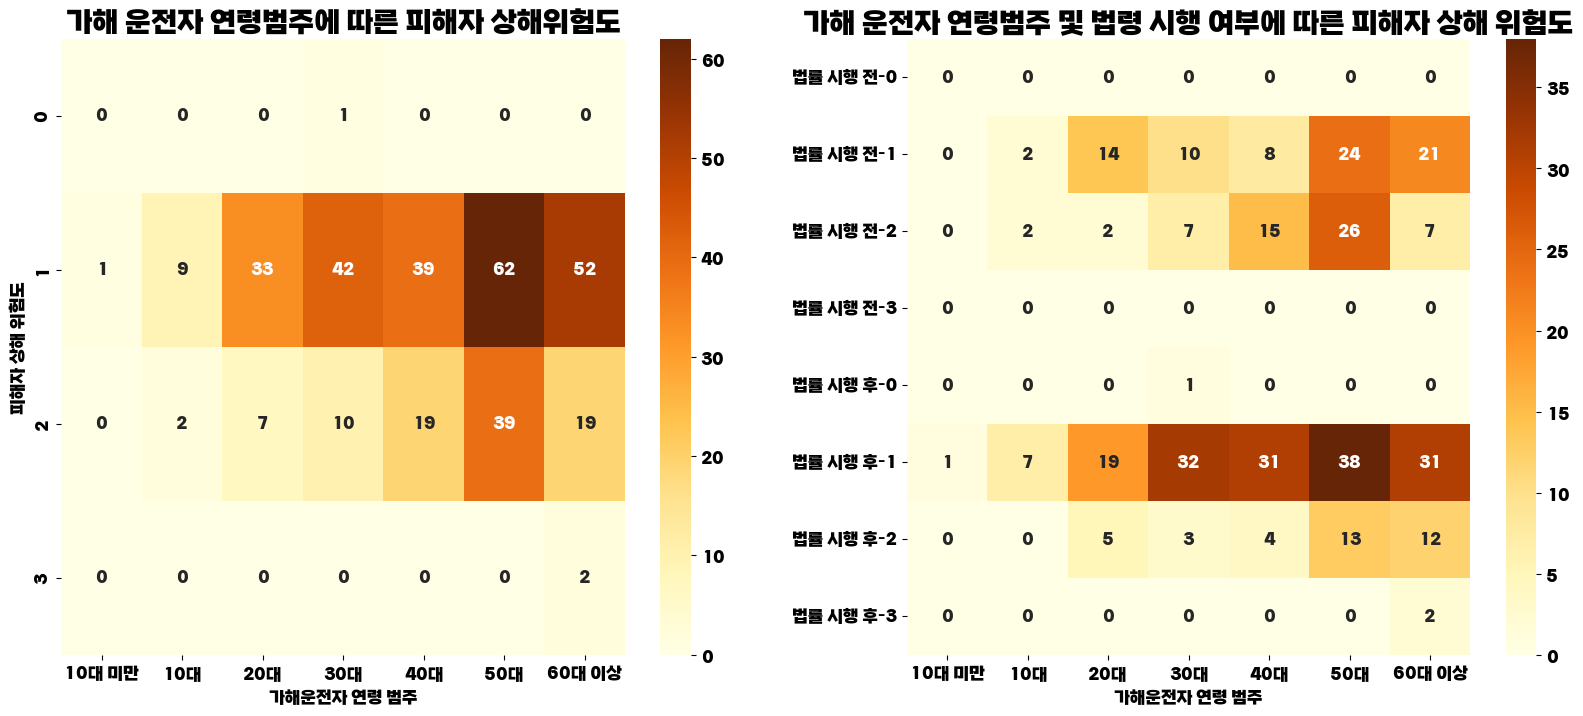

In [369]:
# 앞선 자료를 자세히 보기 위해 히트맵을 이용
# 전체 데이터를 토대로 하면 많은 사고들은 다양한 연령층에서 발생하는데, 특히 50대, 60대 이상이 많은편
# 법률 시행 전/후를 토대로 다시 한번 비교해보면, 모든 세대에서 경상 수준(1)의 상해 위험도는 증가했지만,
# 특히 60대 이상은 경상(1), 중상(2), 사망(3)에 해당되는 상해위험도가 모두 증가한 유일한 세대임.

fig= plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

table= df_child_2017_2022.pivot_table(index=["피해운전자 상해 위험도"],columns=["가해운전자 연령 범주"],aggfunc="size")
sns.heatmap(table,annot=True,fmt="d",cmap="YlOrBr",ax=ax1)
ax1.set_ylabel("피해자 상해 위험도",size=12)

ax1.set_title("가해 운전자 연령범주에 따른 피해자 상해위험도",size=20) 
table1= df_child_2017_2022.pivot_table(index=["법률 시행 전/후","피해운전자 상해 위험도"],columns=["가해운전자 연령 범주"],aggfunc="size")
sns.heatmap(table1,annot=True,fmt="d",cmap="YlOrBr",ax=ax2)
ax2.set_title("가해 운전자 연령범주 및 법령 시행 여부에 따른 피해자 상해 위험도",size=20) 
ax2.set_ylabel("")

plt.show()

In [372]:
# pdf1 =pd.pivot_table(df_child_2017_2022,index=["가해운전자 연령 범주","법률 시행 전/후"],values="피해운전자 상해 위험도")

c:\Users\KDP-024\anaconda3\envs\MY_PYTHON\lib\site-packages\seaborn\categorical.py:3025: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)


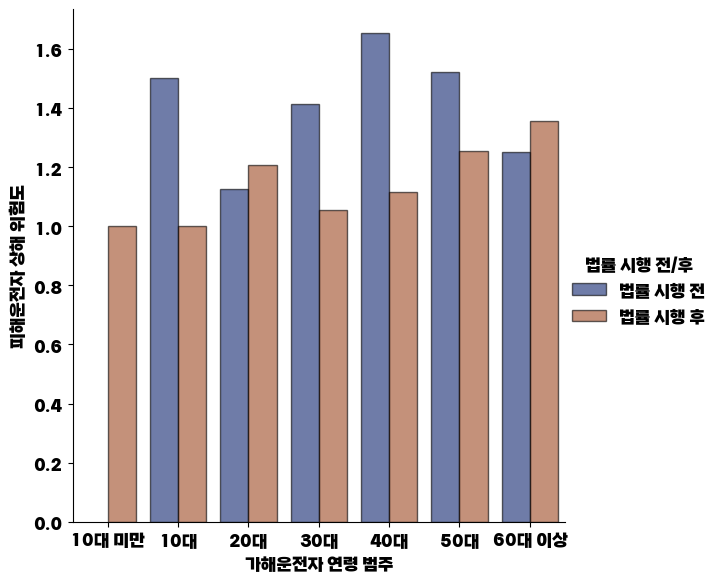

In [379]:
sns.catplot(data=df_child_2017_2022, kind="bar",x="가해운전자 연령 범주", y="피해운전자 상해 위험도", edgecolor="black",hue="법률 시행 전/후",errorbar=None, palette="dark", alpha=.6, height=6,ax=ax1)